ECE 3311 - Project 2 (Team 6: Maya Flores, Selina Spry, Emma Williams)

In [2]:
# imports 
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math

In [3]:
# Define plotting parameters
pxoffset = 1
pyoffset = 1
pwidth = 4
pheight = 3
txtsize = 9

# simulation parameters
L = 100   # Length of the overall transmission
N = 10    # Pulse duration for rectangular pulse train
M = 10    # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [4]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [5]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

In [6]:
def plot_3plot_3stem(plot1, plot2, plot3, plot4, plot5, plot6):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)
    plt.plot(np.arange(1,L+1),plot1)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(322)
    plt.stem(np.arange(1,L+1),plot2)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(323)
    plt.plot(np.arange(1,L+1),plot3)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(324)
    plt.stem(np.arange(1,L+1),plot4)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(325)
    plt.plot(np.arange(1,L+1),plot5)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(326)
    plt.stem(np.arange(1,L+1),plot6)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.show()

In [7]:
def plot_6stem(plot1, plot2, plot3, plot4, plot5, plot6):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)
    plt.stem(np.arange(1,L+1),plot1)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(322)
    plt.stem(np.arange(1,L+1),plot2)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(323)
    plt.stem(np.arange(1,L+1),plot3)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(324)
    plt.stem(np.arange(1,L+1),plot4)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.subplot(325)
    plt.stem(np.arange(1,L+1),plot5)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')
    plt.subplot(326)
    plt.stem(np.arange(1,L+1),plot6)
    plt.xlabel('Discrete Time (n)')
    plt.ylabel('Signal Amplitude')

    plt.show()

In [8]:
def analog_cos(freq):
    signal = np.zeros(10)
    for i in range(10):
        signal[i] = np.cos(2*np.pi*freq*i)
    analog_wavefm = interpolate_1d_vector(signal, M)
    return analog_wavefm

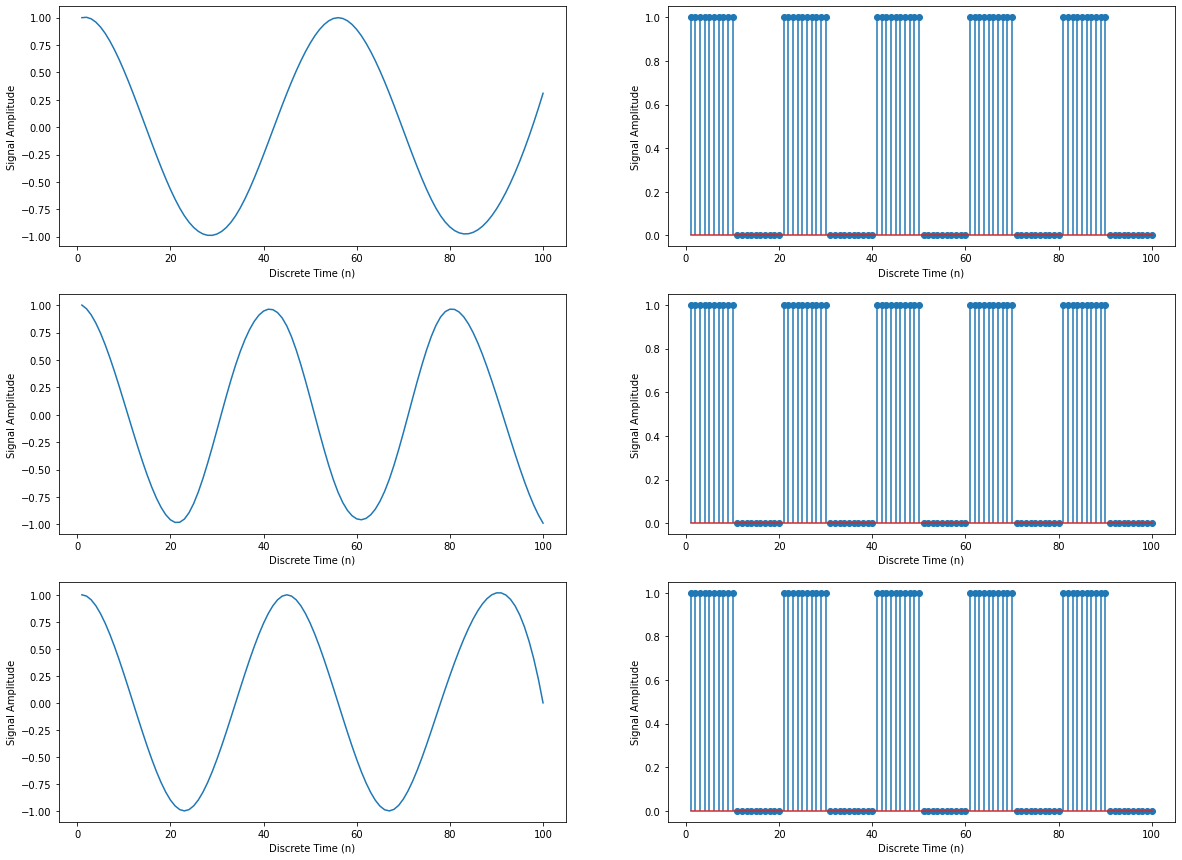

In [9]:
# Question 1:

analog_wavefm1 = analog_cos(0.2)
analog_wavefm2 = analog_cos(0.275)
analog_wavefm3 = analog_cos(0.25)
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(np.arange(1,((L/N)+1)),2),(1,L), order='F')

# Visualize
plot_3plot_3stem(analog_wavefm1, impulsetrain_wavefm.T, analog_wavefm2, impulsetrain_wavefm.T, analog_wavefm3, impulsetrain_wavefm.T)

In [10]:
def pam(waveform):
    # Natural Sampling PAM
    nspam_wavefm = np.multiply(impulsetrain_wavefm, waveform).T#impulsetrain_wavefm.*analog_wavefm;

    # Flat-Top PAM

    #downsampling
    temp1 = waveform[0::2*N]

    # upsampling 
    temp2 = (int)(N/2)
    temp3 = N
    temp = np.zeros((temp3,))
    temp[::2] = temp1

    ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F')

    return nspam_wavefm, ftpam_wavefm


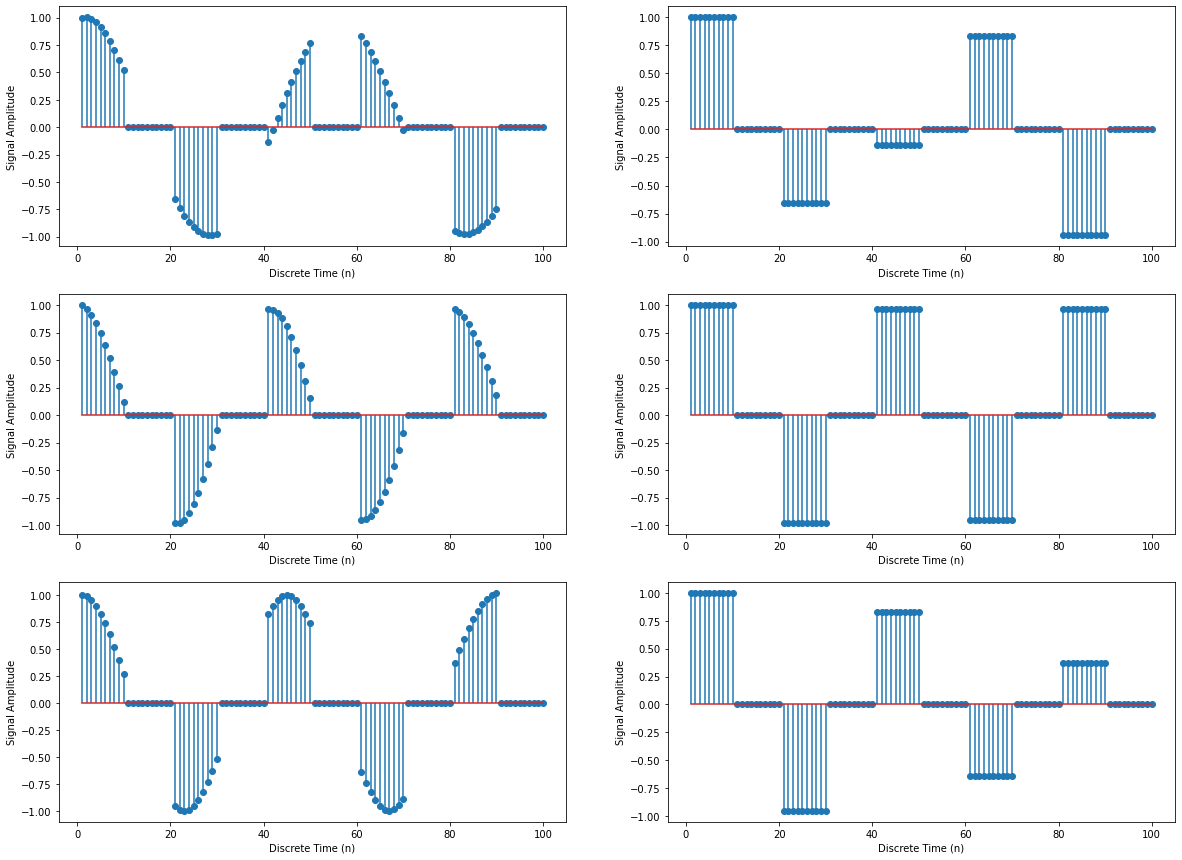

In [11]:
# Question 2:
pam_wave1 = pam(analog_wavefm1)
pam_wave2 = pam(analog_wavefm2)
pam_wave3 = pam(analog_wavefm3)

# Visualize
plot_6stem(pam_wave1[0], pam_wave1[1].T, pam_wave2[0], pam_wave2[1].T, pam_wave3[0], pam_wave3[1].T)

In [12]:
def pcm(waveform):
    # Create PCM waveform and its corresponding error waveform
    [ind,quantv] = quantize(waveform[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
    pcm_wavefm = np.reshape(np.ones((N,1))*quantv,[1,L], order='F')
    pcm_err_wavefm = waveform - pcm_wavefm
    return pcm_wavefm, pcm_err_wavefm

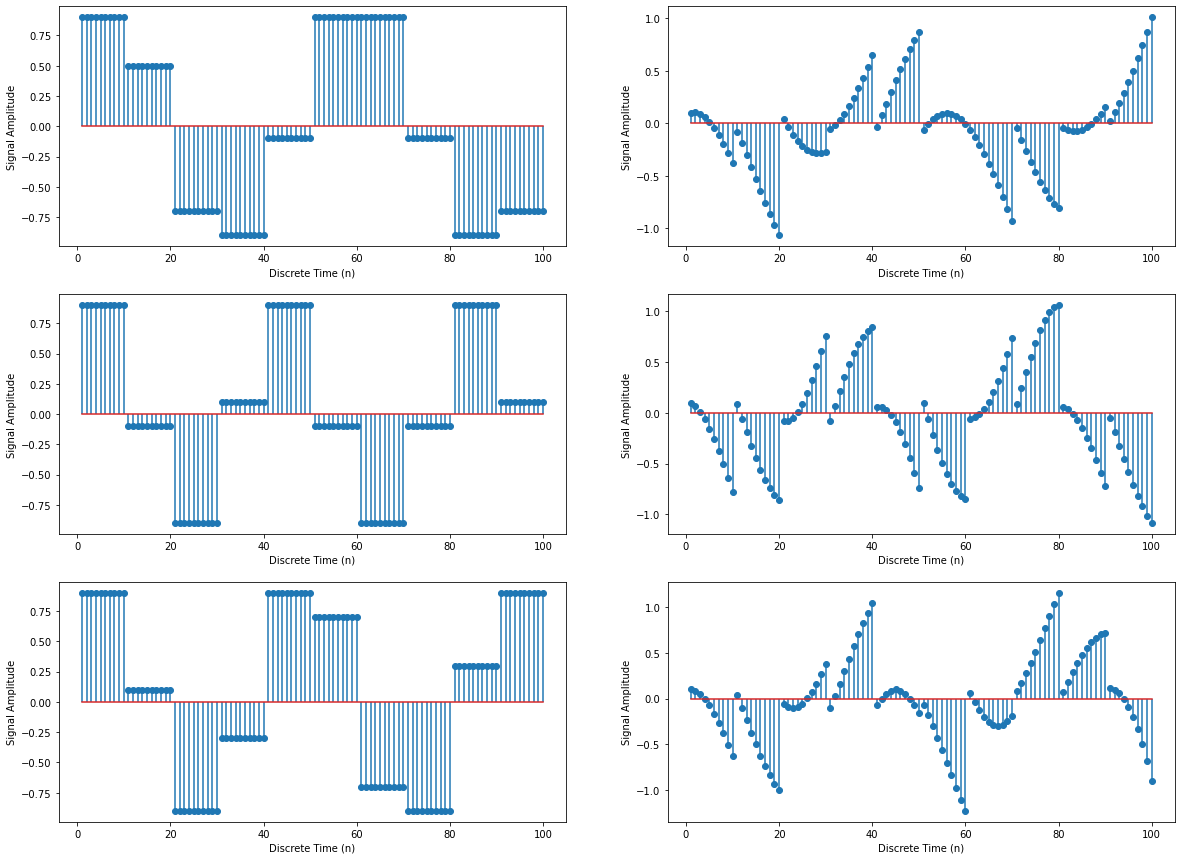

In [13]:
# Question 3:
pcm_wave1 = pcm(analog_wavefm1)
pcm_wave2 = pcm(analog_wavefm2)
pcm_wave3 = pcm(analog_wavefm3)

# Visualize
plot_6stem(pcm_wave1[0].T, pcm_wave1[1].T, pcm_wave2[0].T, pcm_wave2[1].T, pcm_wave3[0].T, pcm_wave3[1].T)


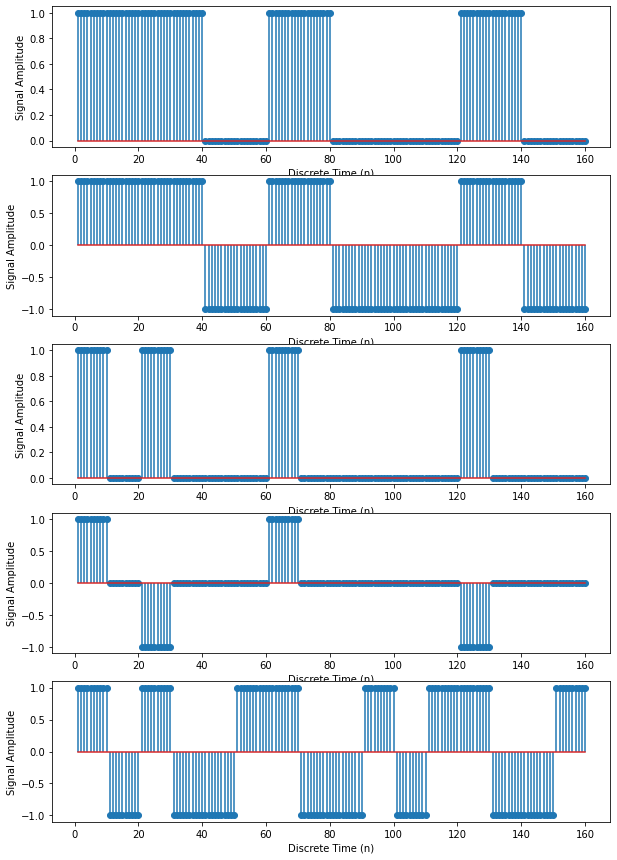

In [14]:
# Question 4:

# Generate your own line codes for the binary string `11001100'
bin_str = [1,1,0,1,0,0,1,0]
counter = 0

# unipolar NRZ
upnrz1 = np.ones((1,L_lc))
upnrz0 = np.zeros((1,L_lc))
upnrz_wavefm = list()
bpflag = 0

# polar NRZ
pnrz1 = np.ones((1,L_lc))
pnrz0 = np.full((1,L_lc),-1)
pnrz_wavefm = list()

# unipolar RZ
uprz1_begin = np.ones((1,(int)(L_lc/2)))
uprz1_end = np.zeros((1,(int)(L_lc/2)))
uprz1 = np.append(uprz1_begin,uprz1_end)
uprz0 = np.zeros((1,L_lc))
uprz_wavefm = list()

# bipolar RZ
bprz1_begin = np.ones((1,(int(L_lc/2))))
bprz1n_begin = np.full((1,(int)(L_lc/2)),-1)
bprz1_end = np.zeros((1,(int)(L_lc/2)))
bprz1 = np.append(bprz1_begin,bprz1_end)
bprz1n = np.append(bprz1n_begin,bprz1_end)
bprz0 = np.zeros((1,L_lc))
bprz_wavefm = list()

# # manchester NRZ
up = np.ones((1,(int(L_lc/2))))
down = np.full((1,(int)(L_lc/2)),-1)
manrz1 = np.append(up, down)
manrz0 = np.append(down, up)
manrz_wavefm = list()

for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        upnrz_wavefm.append(upnrz1.flatten())
        pnrz_wavefm.append(pnrz1.flatten())
        uprz_wavefm.append(uprz1.flatten())
        manrz_wavefm.append(manrz1.flatten())
        if (counter%2 ==0):  # if even number
            bprz_wavefm.append(bprz1.flatten())
        else:
            bprz_wavefm.append(bprz1n.flatten())
        counter += 1
    else:
        upnrz_wavefm.append(upnrz0.flatten())
        pnrz_wavefm.append(pnrz0.flatten())
        uprz_wavefm.append(uprz0.flatten())
        bprz_wavefm.append(bprz0.flatten())
        manrz_wavefm.append(manrz0.flatten())

# Visualize
plt.figure(figsize=(10,15))
# unipolar NRZ
plt.subplot(511)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(upnrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# polar NRZ
plt.subplot(512)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(pnrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# unipolar RZ
plt.subplot(513)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(uprz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# bipolar RZ
plt.subplot(514)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(bprz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
# manchester NRZ
plt.subplot(515)
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(manrz_wavefm).flatten())
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

plt.show()

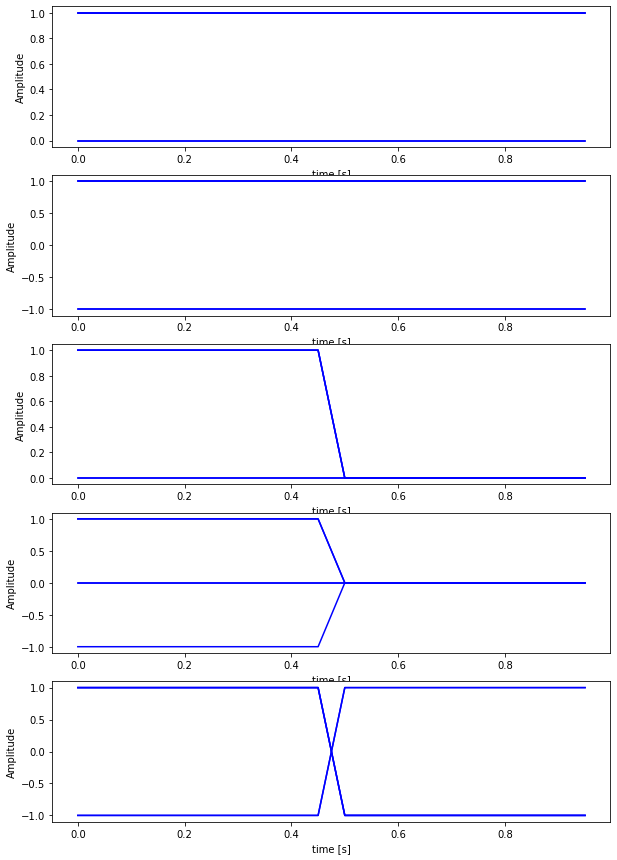

In [15]:
# Generate unipolar waveform
# rand_bin_str = np.around(np.random.random((1,L))).flatten()
# new_upnrz_wavefm = []
# for ind in range(0, len(rand_bin_str)):
#     if (rand_bin_str[ind] == 1):
#         new_upnrz_wavefm.append(upnrz1.flatten())
#     else:
#         new_upnrz_wavefm.append(upnrz0.flatten())

# Visualize
# Unipolar-waveform
def eyediagram(waveform):
    sig = np.array(waveform).flatten()
    t = np.linspace(0.0, ((N-1)/N), N)
    return t, sig

# Plot eye diagram
M = 100
N=20
upnrz_eye = eyediagram(upnrz_wavefm)
pnrz_eye = eyediagram(pnrz_wavefm)
uprz_eye = eyediagram(uprz_wavefm)
bprz_eye = eyediagram(bprz_wavefm)
manrz_eye = eyediagram(manrz_wavefm)
sig = 0

#unipolar NRZ
plt.figure(figsize=(10,15))
plt.subplot(511)
for p in range(int(M/N)):
    sig = upnrz_eye[1]
    plt.plot(upnrz_eye[0],sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')

#polar NRZ
plt.subplot(512)
for p in range(int(M/N)):
    sig = pnrz_eye[1]
    plt.plot(pnrz_eye[0],sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')

#unipolar RZ
plt.subplot(513)
for p in range(int(M/N)):
    sig = uprz_eye[1]
    plt.plot(uprz_eye[0],sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')

#bipolar RZ
plt.subplot(514)
for p in range(int(M/N)):
    sig = bprz_eye[1]
    plt.plot(bprz_eye[0],sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')

#manchester RZ
plt.subplot(515)
for p in range(int(M/N)):
    sig = manrz_eye[1]
    plt.plot(manrz_eye[0],sig[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()

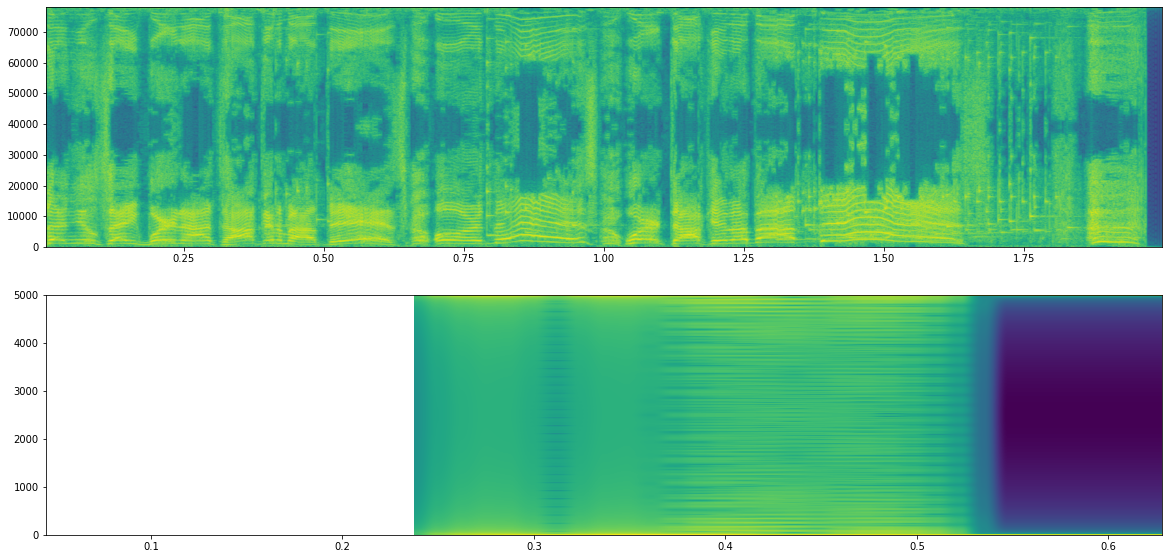

In [64]:
#Question 6

from scipy.io import wavfile as wav
from scipy import signal
import wave, struct
%matplotlib inline
plt.figure(figsize=(20, 15))

plot1 = plt.subplot(311)
rate1, data1 = wav.read('mystery_1.wav')
signal1 = wave.open('mystery_1.wav', 'r')
sig1 = np.frombuffer(signal1.readframes(156000), dtype=np.int16)
wav.write('mystery_1_sample.wave',18000,data1)

plot1.specgram(sig1, NFFT=1024, Fs=156000, noverlap=900)

plot2 = plt.subplot(312)
rate2, data2 = wav.read('mystery_2.wav')
signal2 = wave.open('mystery_2.wav', 'r')
sig2 = np.frombuffer(signal1.readframes(10000), dtype=np.int16)
wav.write('mystery_2_sample.wave',280000,data2)

plot2.specgram(sig2, NFFT=1024, Fs=10000, noverlap=900)
   

# plt.subplot(313)
# rate3, data3 = wav.read('mystery_3.wav')
# plt.plot(data)

# wav.write('mystery_3_sample.wave',160000,data3)

plt.show()




In [56]:
def dectobin(value):
    if value>1:
        dectobin(value//2)
        return value%2
    else: 
        return value

In [57]:
#Question 7
Vmax = max(sig1)
Vmin = min(sig1)
length = len(sig1)
non0_encoded = np.zeros(len(sig1))

N = 32

codes = 2**10
codebook = np.linspace(Vmin, Vmax, codes)
partitions = np.linspace(Vmin + abs(codebook[2]-codebook[1]), Vmax, codes-1)

[ind, quantv] = quantize(sig1[0::N], partitions, codebook)
pcm_waveform = np.reshape(np.ones((N,1))*quantv,[1,length], order = 'F')
pcm_err_wavefm = sig1 - pcm_waveform
#binary_vals = np.linspace(0, codes-1, codes)

binary_str = []
binary_values = []
for i in range(len(pcm_waveform)):
    for l in range(len(pcm_waveform[i])):
     temp = int(pcm_waveform[i][l])
     if temp < 0:
         temp = temp+(1<<32)
     else:
         temp = temp
     binary_str.append(bin(temp))

for j in range(len(binary_str)):
    for k in range(len(binary_str[j])):
        temp = binary_str[j]
        val_str = temp[k]
        if(val_str == '0' or val_str == '1'):
            val = int(val_str)
            binary_values.append(val)
print(binary_values)

# for i in range(pcm_waveform):
#     binary_vals[i] = (int)bin(pcm_waveform[i])
# for i in range(len(quantv)):
#     if(quantv[i] != 0):
#         non0_encoded[i] = quantv[i]
    
# for i in range(codes):
#     binary_vals[i] = dectobin(binary_vals[i])

# for i in range(len(non0_encoded)):
#     if non0_encoded[i] in codebook:
#         temp = non0_encoded[i]

    
# plt.stem(np.arange(1,length+1), pcm_err_wavefm.T)
# plt.show()


, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,